In [1]:
from load_and_extract import load_and_extract, load_feature_extractor
from cloak_image import cloak_image
import matplotlib.pyplot as plt


2025-06-13 15:38:49.249182: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
def vgg_deprocess(img_tensor):
    img = img_tensor[0].copy()
    img = img[..., ::-1]  # BGR → RGB
    mean = [103.939, 116.779, 123.68]
    img[..., 0] += mean[0]
    img[..., 1] += mean[1]
    img[..., 2] += mean[2]
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-61.34..76.0305].


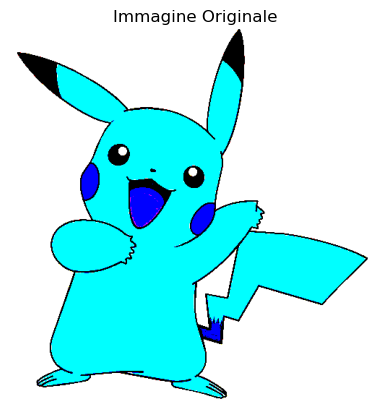

In [11]:
# Percorso immagine 512x512 (metti quella reale)
image_path = "Pikachu.png"

# Caricamento immagine e feature originali
img, features = load_and_extract(image_path)

# Mostra l'immagine
plt.imshow((img[0] + 1) / 2)  # de-normalizzazione da [-1,1] a [0,1]
plt.title("Immagine Originale")
plt.axis('off')
plt.show()




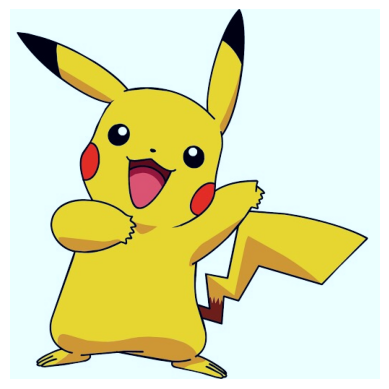

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from load_and_extract import load_and_extract  # già correttamente importato

# STEP 1: funzione di deprocessamento
def vgg_deprocess(img_tensor):
    img = img_tensor[0].copy()
    img = img[..., ::-1]
    mean = [103.939, 116.779, 123.68]
    img[..., 0] += mean[0]
    img[..., 1] += mean[1]
    img[..., 2] += mean[2]
    return np.clip(img, 0, 255).astype(np.uint8)

# STEP 2: carica immagine
img, features = load_and_extract("Pikachu.png")

# STEP 3: mostra immagine coi colori giusti
plt.imshow(vgg_deprocess(img))
plt.axis("off")
#plt.title("Pikachu")
plt.show()


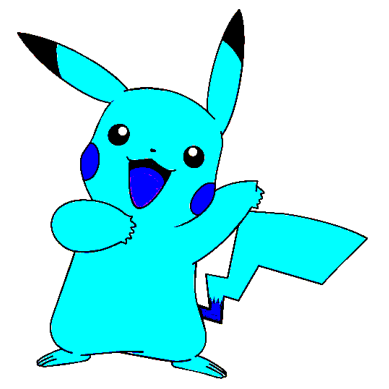

In [9]:
# Carica modello VGG tagliato
model = load_feature_extractor()

# Applica il cloak
img_cloaked = cloak_image(img, features, model)

# Visualizza risultato
plt.imshow((img_cloaked[0] + 1) / 2)
#plt.title("Immagine Cloaked")
plt.axis('off')
plt.show()


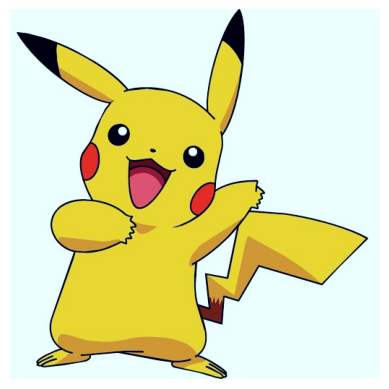

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from load_and_extract import vgg_deprocess

# Applica cloak → restituisce solo la perturbazione!
perturbation = cloak_image(img, features, model)

# Se serve, converti in NumPy
if hasattr(perturbation, 'numpy'):
    perturbation = perturbation.numpy()

# Somma perturbazione all'immagine originale
img_cloaked = img + perturbation

# Visualizza immagine cloakata in RGB corretto
plt.imshow(vgg_deprocess(img_cloaked))
plt.axis("off")
#plt.title("Pikachu Cloaked")
plt.show()


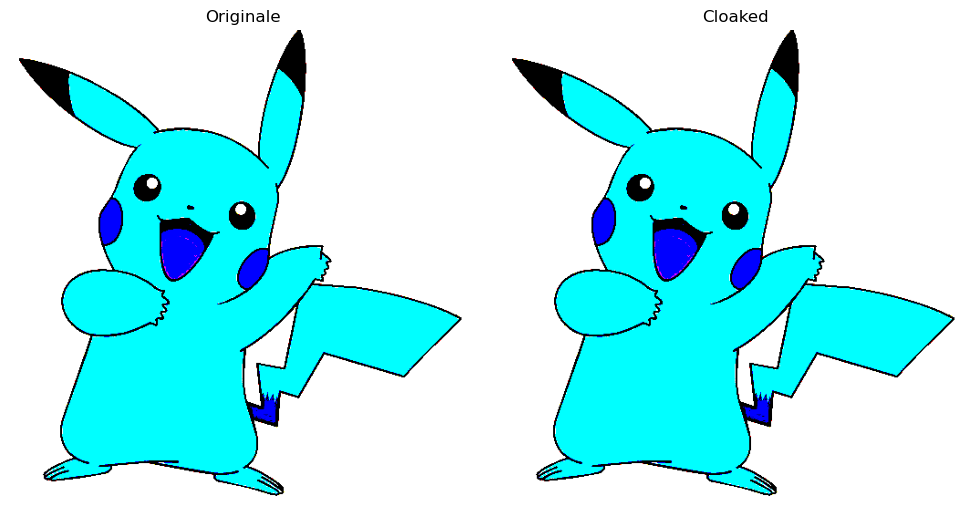

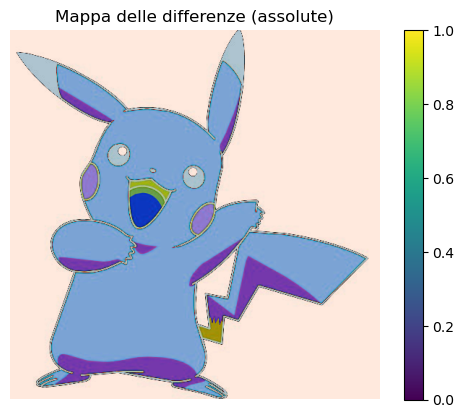

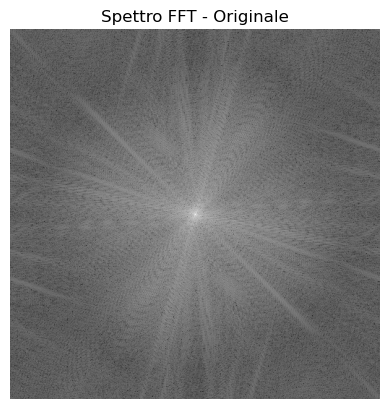

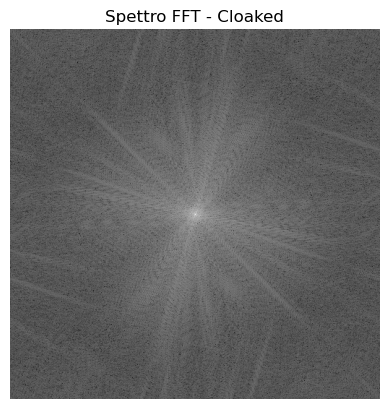

📏 PSNR: -35.83 dB
🔍 SSIM: 0.0174


In [4]:
from analyze_results import (
    show_images_side_by_side,
    show_difference_map,
    show_fft,
    compute_metrics
)

show_images_side_by_side(img, img_cloaked)
show_difference_map(img, img_cloaked)
show_fft(img, "Originale")
show_fft(img_cloaked, "Cloaked")
compute_metrics(img, img_cloaked)



In [10]:
# Carica modello VGG tagliato
model = load_feature_extractor()

# Applica il cloak
img_cloaked = cloak_image(img, features, model)

# Visualizza risultato con colori reali
from load_and_extract import vgg_deprocess  # se non l'hai già importato

plt.imshow(vgg_deprocess(img_cloaked))
plt.title("Immagine Cloaked")
plt.axis('off')
plt.show()


KeyboardInterrupt: 

In [5]:
from load_and_extract import extract_features
import numpy as np

# Calcola le feature dell'immagine cloaked
cloaked_features = extract_features(img_cloaked, model)

# Calcola la distanza L2 tra vettori di feature
distance = np.linalg.norm(cloaked_features - features)
print(f"📏 L2 distance tra original e cloaked features: {distance:.4f}")


📏 L2 distance tra original e cloaked features: 4010.0657
